# MCBS Dataset Loader Tutorial

This notebook demonstrates the dynamic dataset discovery functionality in MCBS. The library can discover datasets from the remote repository in real-time, even if they were added after the MCBS package was released.

## Key Features

- **Dynamic Dataset Discovery**: Discover datasets that were added after the package was released
- **Automatic Caching**: Datasets are cached locally for faster access
- **Metadata Access**: Get detailed information about each dataset
- **Simple API**: Load any dataset with just one line of code

In [26]:
# Import the necessary functions from mcbs.datasets
from mcbs.datasets import fetch_data, list_available_datasets, get_dataset_info
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options
pd.set_option('display.max_columns', 20)
plt.style.use('ggplot')

## 1. Discovering Available Datasets

First, let's see what datasets are available in the remote repository. This will query the GitHub repository in real-time.

In [27]:
# Get real-time list of all available datasets
available_datasets = list_available_datasets()
print(f"Found {len(available_datasets)} available datasets:\n")

# Print the list of available datasets
for dataset in available_datasets:
    print(f"- {dataset}")

INFO:mcbs.datasets.dataset_loader:Fetching metadata from: https://raw.githubusercontent.com/carlosguirado/mcbs-datasets/master/metadata.json
INFO:mcbs.datasets.dataset_loader:Cached metadata to: /Users/carlosguirado/.mcbs/datasets/metadata.json
INFO:mcbs.datasets.dataset_loader:Querying GitHub API for available datasets: https://api.github.com/repos/carlosguirado/mcbs-datasets/contents/datasets
INFO:mcbs.datasets.dataset_loader:Discovered 4 datasets from remote repository


Found 4 available datasets:

- chicago_mode_choice_dataset
- ltds_dataset
- modecanada_dataset
- swissmetro_dataset


## 2. Getting Dataset Information

Now let's get more detailed information about each dataset.

In [28]:
# Create a DataFrame to display dataset information
dataset_info = []

for dataset_name in available_datasets:
    try:
        info = get_dataset_info(dataset_name)
        dataset_info.append({
            'Name': dataset_name,
            'Description': info.get('description', 'N/A'),
            'Samples': info.get('n_samples', 'N/A'),
            'Features': info.get('n_features', 'N/A'),
            'Target': info.get('target', 'N/A')
        })
    except Exception as e:
        print(f"Error getting info for {dataset_name}: {str(e)}")

# Display the information as a table
pd.DataFrame(dataset_info)

INFO:mcbs.datasets.dataset_loader:Fetching metadata from: https://raw.githubusercontent.com/carlosguirado/mcbs-datasets/master/metadata.json
INFO:mcbs.datasets.dataset_loader:Cached metadata to: /Users/carlosguirado/.mcbs/datasets/metadata.json


,Name,Description,Samples,Features,Target
0,chicago_mode_choice_dataset,2019 Chicago my daily travel survey dataset. W...,26099,8,mode
1,ltds_dataset,London Travel Demand Survey (LTDS),81086,35,travel_mode
2,modecanada_dataset,ModeCanada,15520,11,choice
3,swissmetro_dataset,Swissmetro,10728,27,CHOICE


## 3. Loading a Dataset

Let's load one of the datasets. The `fetch_data` function will:
1. Check if the dataset is cached locally
2. If not, download it from the remote repository
3. Cache it locally for future use
4. Return it as a pandas DataFrame

In [29]:
# Load the Swissmetro dataset
swissmetro_data = fetch_data('swissmetro_dataset')

# Display basic information about the dataset
print(f"Dataset shape: {swissmetro_data.shape}")
print(f"\nColumn names:")
print(", ".join(swissmetro_data.columns))

# Display the first 5 rows
swissmetro_data.head()

INFO:mcbs.datasets.dataset_loader:Local cache disabled. Downloading dataset from remote source.
INFO:mcbs.datasets.dataset_loader:Downloading dataset from: https://raw.githubusercontent.com/carlosguirado/mcbs-datasets/master/datasets/swissmetro/swissmetro.csv.gz
INFO:mcbs.datasets.dataset_loader:Successfully loaded dataset 'swissmetro_dataset' with shape (10728, 28)


Dataset shape: (10728, 28)

Column names:
GROUP, SURVEY, SP, ID, PURPOSE, FIRST, TICKET, WHO, LUGGAGE, AGE, MALE, INCOME, GA, ORIGIN, DEST, TRAIN_AV, CAR_AV, SM_AV, TRAIN_TT, TRAIN_CO, TRAIN_HE, SM_TT, SM_CO, SM_HE, SM_SEATS, CAR_TT, CAR_CO, CHOICE


,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,...,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,...,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,...,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,...,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,...,130,36,60,63,42,20,0,90,84,2


## 4. Basic Data Exploration

Now let's do some basic exploration of the loaded dataset.

In [30]:
# Check data types
swissmetro_data.dtypes

GROUP       int64
SURVEY      int64
SP          int64
ID          int64
PURPOSE     int64
FIRST       int64
TICKET      int64
WHO         int64
LUGGAGE     int64
AGE         int64
MALE        int64
INCOME      int64
GA          int64
ORIGIN      int64
DEST        int64
TRAIN_AV    int64
CAR_AV      int64
SM_AV       int64
TRAIN_TT    int64
TRAIN_CO    int64
TRAIN_HE    int64
SM_TT       int64
SM_CO       int64
SM_HE       int64
SM_SEATS    int64
CAR_TT      int64
CAR_CO      int64
CHOICE      int64
dtype: object

In [31]:
# Summary statistics
swissmetro_data.describe()

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
count,10728.000000,10728.000000,10728.0,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,...,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000
mean,2.630034,0.630034,1.0,596.500000,2.914430,0.470638,2.888423,1.493289,0.678691,2.898490,...,166.626025,514.335477,70.100671,87.466350,670.340697,20.020507,0.118568,123.795209,78.742077,2.152778
std,0.482818,0.482818,0.0,344.116678,1.147443,0.499160,2.191100,0.708293,0.603388,1.031726,...,77.353284,1088.931881,37.431633,53.550371,1441.594614,8.161895,0.323295,88.710743,55.263663,0.632293
min,2.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,31.000000,4.000000,30.000000,8.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.0,298.750000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,109.000000,58.000000,30.000000,55.000000,70.000000,10.000000,0.000000,70.000000,40.000000,2.000000
50%,3.000000,1.000000,1.0,596.500000,3.000000,0.000000,3.000000,1.000000,1.000000,3.000000,...,157.000000,94.000000,60.000000,78.000000,111.000000,20.000000,0.000000,120.000000,76.000000,2.000000
75%,3.000000,1.000000,1.0,894.250000,3.250000,1.000000,3.000000,2.000000,1.000000,4.000000,...,209.000000,170.000000,120.000000,109.000000,209.000000,30.000000,0.000000,176.000000,112.000000,3.000000
max,3.000000,1.000000,1.0,1192.000000,9.000000,1.000000,10.000000,3.000000,3.000000,6.000000,...,1049.000000,5040.000000,120.000000,796.000000,6720.000000,30.000000,1.000000,1560.000000,520.000000,3.000000


## 5. Visualizing Mode Choices

Let's create a simple visualization of the mode choices in the dataset.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


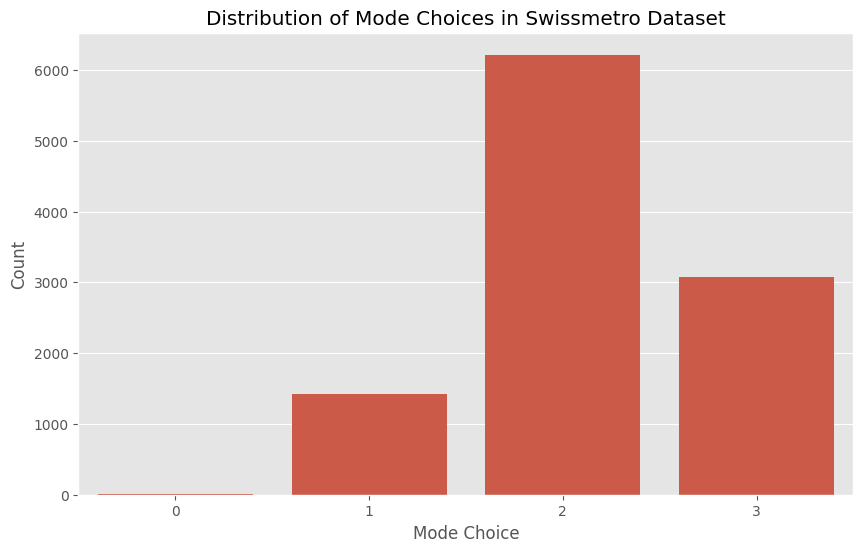

,Count,Percentage
CHOICE,,
2,6216,57.94
3,3080,28.71
1,1423,13.26
0,9,0.08


In [32]:
# Check the target variable distribution
target_column = get_dataset_info('swissmetro_dataset').get('target', 'CHOICE')

# Create a bar plot of the mode choices
plt.figure(figsize=(10, 6))
mode_counts = swissmetro_data[target_column].value_counts()
sns.barplot(x=mode_counts.index, y=mode_counts.values)
plt.title('Distribution of Mode Choices in Swissmetro Dataset')
plt.xlabel('Mode Choice')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the percentage of each mode
mode_percentages = (mode_counts / mode_counts.sum() * 100).round(2)
mode_df = pd.DataFrame({
    'Count': mode_counts,
    'Percentage': mode_percentages
})
mode_df

## 6. Loading a Different Dataset

Let's load another dataset to demonstrate how easy it is to switch between datasets.

In [33]:
# Load the LTDS dataset
ltds_data = fetch_data('ltds_dataset')

# Display basic information
print(f"Dataset shape: {ltds_data.shape}")
print(f"\nColumn names:")
print(", ".join(ltds_data.columns))

# Display the first 5 rows
ltds_data.head()

INFO:mcbs.datasets.dataset_loader:Local cache disabled. Downloading dataset from remote source.
INFO:mcbs.datasets.dataset_loader:Downloading dataset from: https://raw.githubusercontent.com/carlosguirado/mcbs-datasets/master/datasets/ltds/ltds.csv.gz
INFO:mcbs.datasets.dataset_loader:Successfully loaded dataset 'ltds_dataset' with shape (81086, 36)


Dataset shape: (81086, 36)

Column names:
trip_id, household_id, person_n, trip_n, travel_mode, purpose, fueltype, faretype, bus_scale, survey_year, travel_year, travel_month, travel_date, day_of_week, start_time_linear, age, female, driving_license, car_ownership, distance, dur_walking, dur_cycling, dur_pt_total, dur_pt_access, dur_pt_rail, dur_pt_bus, dur_pt_int_total, dur_pt_int_waiting, dur_pt_int_walking, pt_n_interchanges, dur_driving, cost_transit, cost_driving_total, cost_driving_fuel, cost_driving_con_charge, driving_traffic_percent


,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,...,dur_pt_int_total,dur_pt_int_waiting,dur_pt_int_walking,pt_n_interchanges,dur_driving,cost_transit,cost_driving_total,cost_driving_fuel,cost_driving_con_charge,driving_traffic_percent
0,0,0,0,0,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.052222,1.5,0.14,0.14,0.0,0.111702
1,1,0,0,1,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.059444,1.5,0.15,0.15,0.0,0.112150
2,2,0,0,2,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.236667,1.5,0.79,0.79,0.0,0.203052
3,3,0,0,3,drive,HBO,Petrol_Car,full,1.0,1,...,0.0,0.0,0.0,0,0.233333,1.5,0.78,0.78,0.0,0.160714
4,4,0,1,2,drive,HBO,Petrol_Car,dis,1.0,1,...,0.0,0.0,0.0,0,0.229167,1.5,0.78,0.78,0.0,0.130909


## 7. How Does the Dynamic Discovery Work?

The dataset discovery works by:

1. First checking local metadata for known datasets
2. Fetching remote metadata from the GitHub repository
3. Using the GitHub API to discover dataset directories in the repository

This means MCBS can discover datasets that were added after the package was released!

## Conclusion

The MCBS dataset loader provides a simple and powerful way to access transportation mode choice datasets. Key benefits:

- **One-line data loading**: `data = fetch_data('dataset_name')`
- **Dynamic discovery**: Always finds the latest datasets
- **Automatic caching**: Fast access to previously used datasets
- **Consistent interface**: All datasets follow the same format

This makes it easy to benchmark models across multiple datasets without having to worry about data preprocessing or storage. It also makes it possible for the research community to add datasets to a centralised repository.